This notebook makes plots showing constraints and discovery reach for PBH searches with MeV gamma-ray telescopes for [Direct Detection of Hawking Radiation from Asteroid-Mass Primordial Black Holes](https://arxiv.org/abs/2010.04797) and the GECCO whitepaper.

## Setup

In [59]:
%load_ext autoreload
%autoreload 2

from collections import defaultdict
from itertools import cycle
from os.path import join

import matplotlib.pyplot as plt
import numpy as np
from hazma.gamma_ray_parameters import *
from hazma.parameters import (
    MeV_to_g,
    Msun_to_g,
    g_to_MeV,
    g_to_Msun,
    sv_inv_MeV_to_cm3_per_s,
)
from hazma.pbh import PBH
from matplotlib.ticker import LogLocator, NullFormatter
from pbh_bounds import PBHBounds
from scipy.interpolate import interp1d
from tqdm.auto import tqdm, trange

mpl_colors = 2 * [c["color"] for c in plt.rcParams["axes.prop_cycle"]]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
# This is approximately the same as `gc_bg_model`, but does not constrain
# the input energies.
gc_bg_model_approx = BackgroundModel(
    [0, 1e5], lambda e: 7 * default_bg_model.dPhi_dEdOmega(e)
)


def get_constraints(model, mxs, targets, telescopes, T_obs):
    """
    Helper for computing constraints/projections
    """
    constraints = defaultdict(lambda: np.zeros(len(mxs)))

    for i in trange(len(mxs)):
        model.mx = mxs[i]

        # Existing constraints
        constraints["comptel_nfw"][i] = model.binned_limit(comptel_diffuse)
        constraints["comptel_ein"][i] = model.binned_limit(comptel_diffuse_optimistic)

        # Projections
        for name, (target, bg_model) in targets.items():
            for telescope in telescopes:
                A_eff = eval(f"A_eff_{telescope}")
                energy_res = eval(f"energy_res_{telescope}")
                constraints[f"{telescope}_{name}"][i] = model.unbinned_limit(
                    A_eff,
                    energy_res,
                    T_obs,
                    target,
                    bg_model,
                )

    return dict(constraints)

In [29]:
# For loading existing bounds
default_bounds = [
    "INTEGRAL",
    "CMBevap",
    "EDGESevap",
    "Voyager",
    "511keV",
    "EGRB",
    "LeoTevap",
]
default_bound_labels = [
    "INTEGRAL",
    "CMB",
    "EDGES",
    "Voyager",
    "511 keV",
    "EGRB",
    "Dwarf heating",
]

In [30]:
# Formatting
telescope_colors = {
    "comptel": mpl_colors[0],
    "gecco": mpl_colors[1],
    "adept": mpl_colors[2],
    "amego": mpl_colors[3],
    "e_astrogam": mpl_colors[4],
    "mast": mpl_colors[5],
    "pangu": mpl_colors[6],
    "egret": mpl_colors[7],
    "fermi": mpl_colors[8],
    "grams": mpl_colors[9],
    "grams_upgrade": mpl_colors[10],
}


def get_constraint_label(key):
    label = key.replace("amego_", "AMEGO ")
    label = label.replace("adept_", "AdEPT ")
    label = label.replace("comptel", "COMPTEL ")
    label = label.replace("e_astrogam_", "e-ASTROGAM ")
    label = label.replace("egret", "EGRET ")
    label = label.replace("fermi", "Fermi ")
    label = label.replace("gecco_", "GECCO ")
    label = label.replace("mast_", "MAST ")
    label = label.replace("pangu_", "PANGU ")
    label = label.replace("grams_upgrade_", "GRAMS (upgrade) ")
    label = label.replace("grams_", "GRAMS ")

    label = label.replace("gc_nfw_1_arcmin_cone", "(GC $1'$, NFW)")
    label = label.replace("gc_nfw_5_deg", "(GC $5^\circ$, NFW)")
    label = label.replace("gc_ein_1_arcmin_cone_optimistic", "(GC $1'$, Einasto)")
    label = label.replace("gc_ein_5_deg_optimistic", "(GC $5^\circ$, Einasto)")
    label = label.replace("m31_nfw_1_arcmin_cone", "(M31 $1'$)")
    label = label.replace("m31_nfw_5_deg", "(M31 $5^\circ$)")
    label = label.replace("draco_nfw_1_arcmin_cone", "(Draco $1'$)")
    label = label.replace("draco_nfw_5_deg", "(Draco $5^\circ$)")

    return label

## COMPTEL bound and projections for future telescopes

In [14]:
# Set up analysis
targets = {
    "gc_ein_5_deg_optimistic": (
        gc_targets_optimistic["ein"]["5 deg cone"],
        gc_bg_model_approx,
    ),
    "gc_nfw_5_deg": (gc_targets["nfw"]["5 deg cone"], gc_bg_model_approx),
    "m31_nfw_5_deg": (m31_targets["nfw"]["5 deg cone"], gecco_bg_model),
    "draco_nfw_5_deg": (draco_targets["nfw"]["5 deg cone"], gecco_bg_model),
}
telescopes = ["gecco", "adept", "amego", "e_astrogam", "mast", "pangu", "grams"]
T_obs = 1e8  # s (~3 yr)

# Run it!
pbh = PBH(1e15 * g_to_MeV, spectrum_kind="secondary")  # initialize with valid mass
f_pbh_new = get_constraints(pbh, pbh._mxs, targets, telescopes, T_obs)
m_pbhs = pbh._mxs * MeV_to_g

/Users/acoogan/Physics/Sub-GeV_DM/Hazma/hazma/background_model.py:42: UserWarning: The gamma ray background model is not applicable for energy 101215.995655 MeV.
  warnings.warn(
/Users/acoogan/Physics/Sub-GeV_DM/Hazma/hazma/background_model.py:42: UserWarning: The gamma ray background model is not applicable for energy 10017.780306 MeV.
  warnings.warn(
/Users/acoogan/Physics/Sub-GeV_DM/Hazma/hazma/background_model.py:42: UserWarning: The gamma ray background model is not applicable for energy 0.100000 MeV.
  warnings.warn(
/Users/acoogan/Physics/Sub-GeV_DM/Hazma/hazma/background_model.py:42: UserWarning: The gamma ray background model is not applicable for energy 0.154866 MeV.
  warnings.warn(
/Users/acoogan/Physics/Sub-GeV_DM/Hazma/hazma/background_model.py:42: UserWarning: The gamma ray background model is not applicable for energy 4001.804926 MeV.
  warnings.warn(
/Users/acoogan/Physics/Sub-GeV_DM/Hazma/hazma/background_model.py:42: UserWarning: The gamma ray background model is n

'cmunrm.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


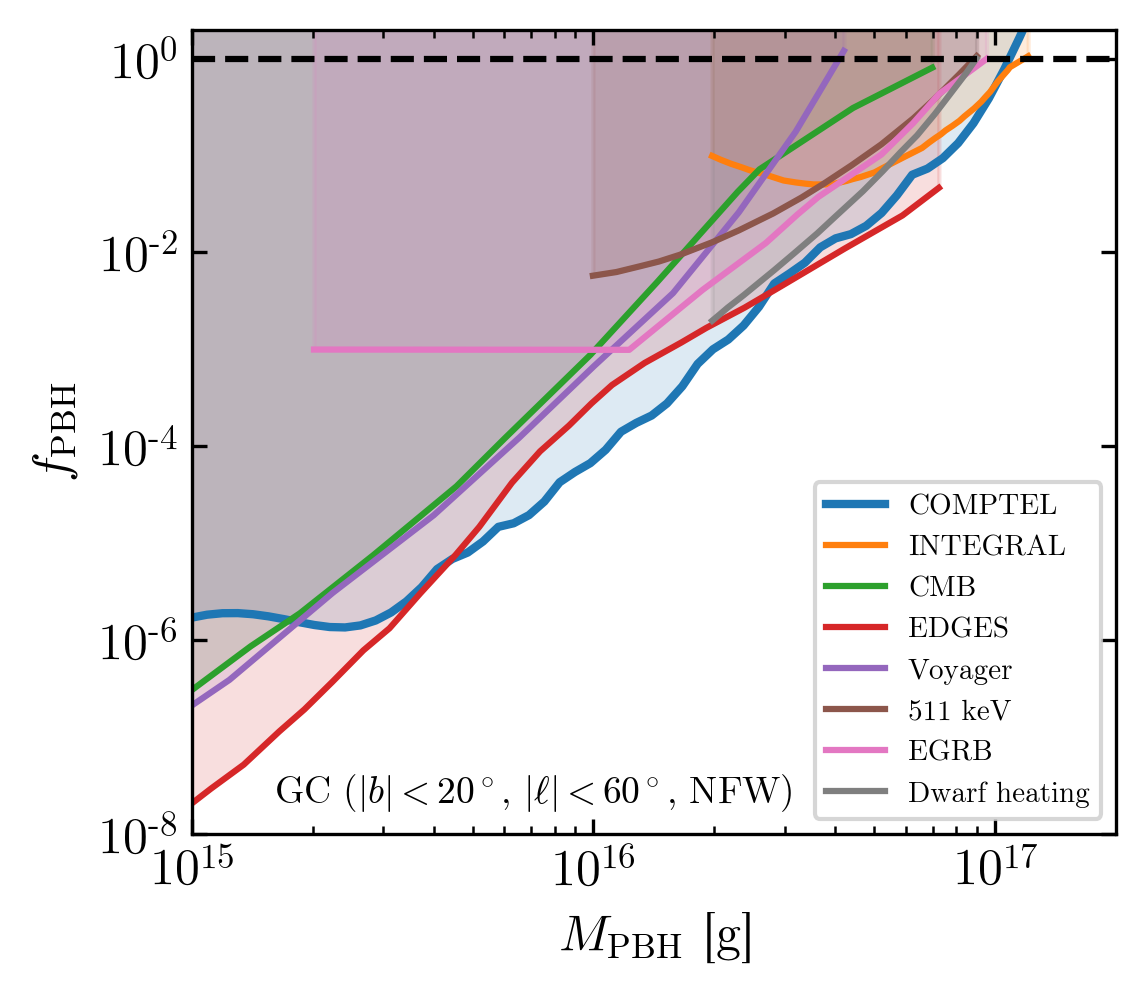

In [19]:
plt.figure(figsize=(4, 3.5))

# New COMPTEL constraint
plt.fill_between(
    m_pbhs,
    f_pbh_new["comptel_nfw"],
    1000,
    color=telescope_colors["comptel"],
    alpha=0.15,
)
plt.loglog(
    m_pbhs,
    f_pbh_new["comptel_nfw"],
    label="COMPTEL",
    color=telescope_colors["comptel"],
    linewidth=2,
)

# Existing constraints
f_pbh_existing = PBHBounds(default_bounds)
for (ms, fs), label, color in zip(
    f_pbh_existing.values(), default_bound_labels, mpl_colors[1:]
):
    plt.fill_between(ms, fs, 10, color=color, alpha=0.15)
    plt.plot(ms, fs, color, label=label)

plt.text(1.6e15, 2.1e-8, r"GC ($|b| < 20^\circ$, $|\ell| < 60^\circ$, NFW)", fontsize=9)

plt.xlabel(r"$M_\mathrm{PBH}$ [g]")
plt.ylabel(r"$f_\mathrm{PBH}$")
plt.axhline(1, color="k", linestyle="--")
plt.xlim(1e15, 2e17)
plt.ylim(1e-8, 2)
plt.xscale("log")
plt.yscale("log")
plt.gca().xaxis.set_ticks_position("both")
plt.gca().yaxis.set_ticks_position("both")
plt.gca().tick_params(axis="both", which="both", direction="in")
plt.legend(fontsize=7)
plt.tight_layout()

plt.savefig("figures/pbh_bounds_comptel.pdf")

'cmunrm.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


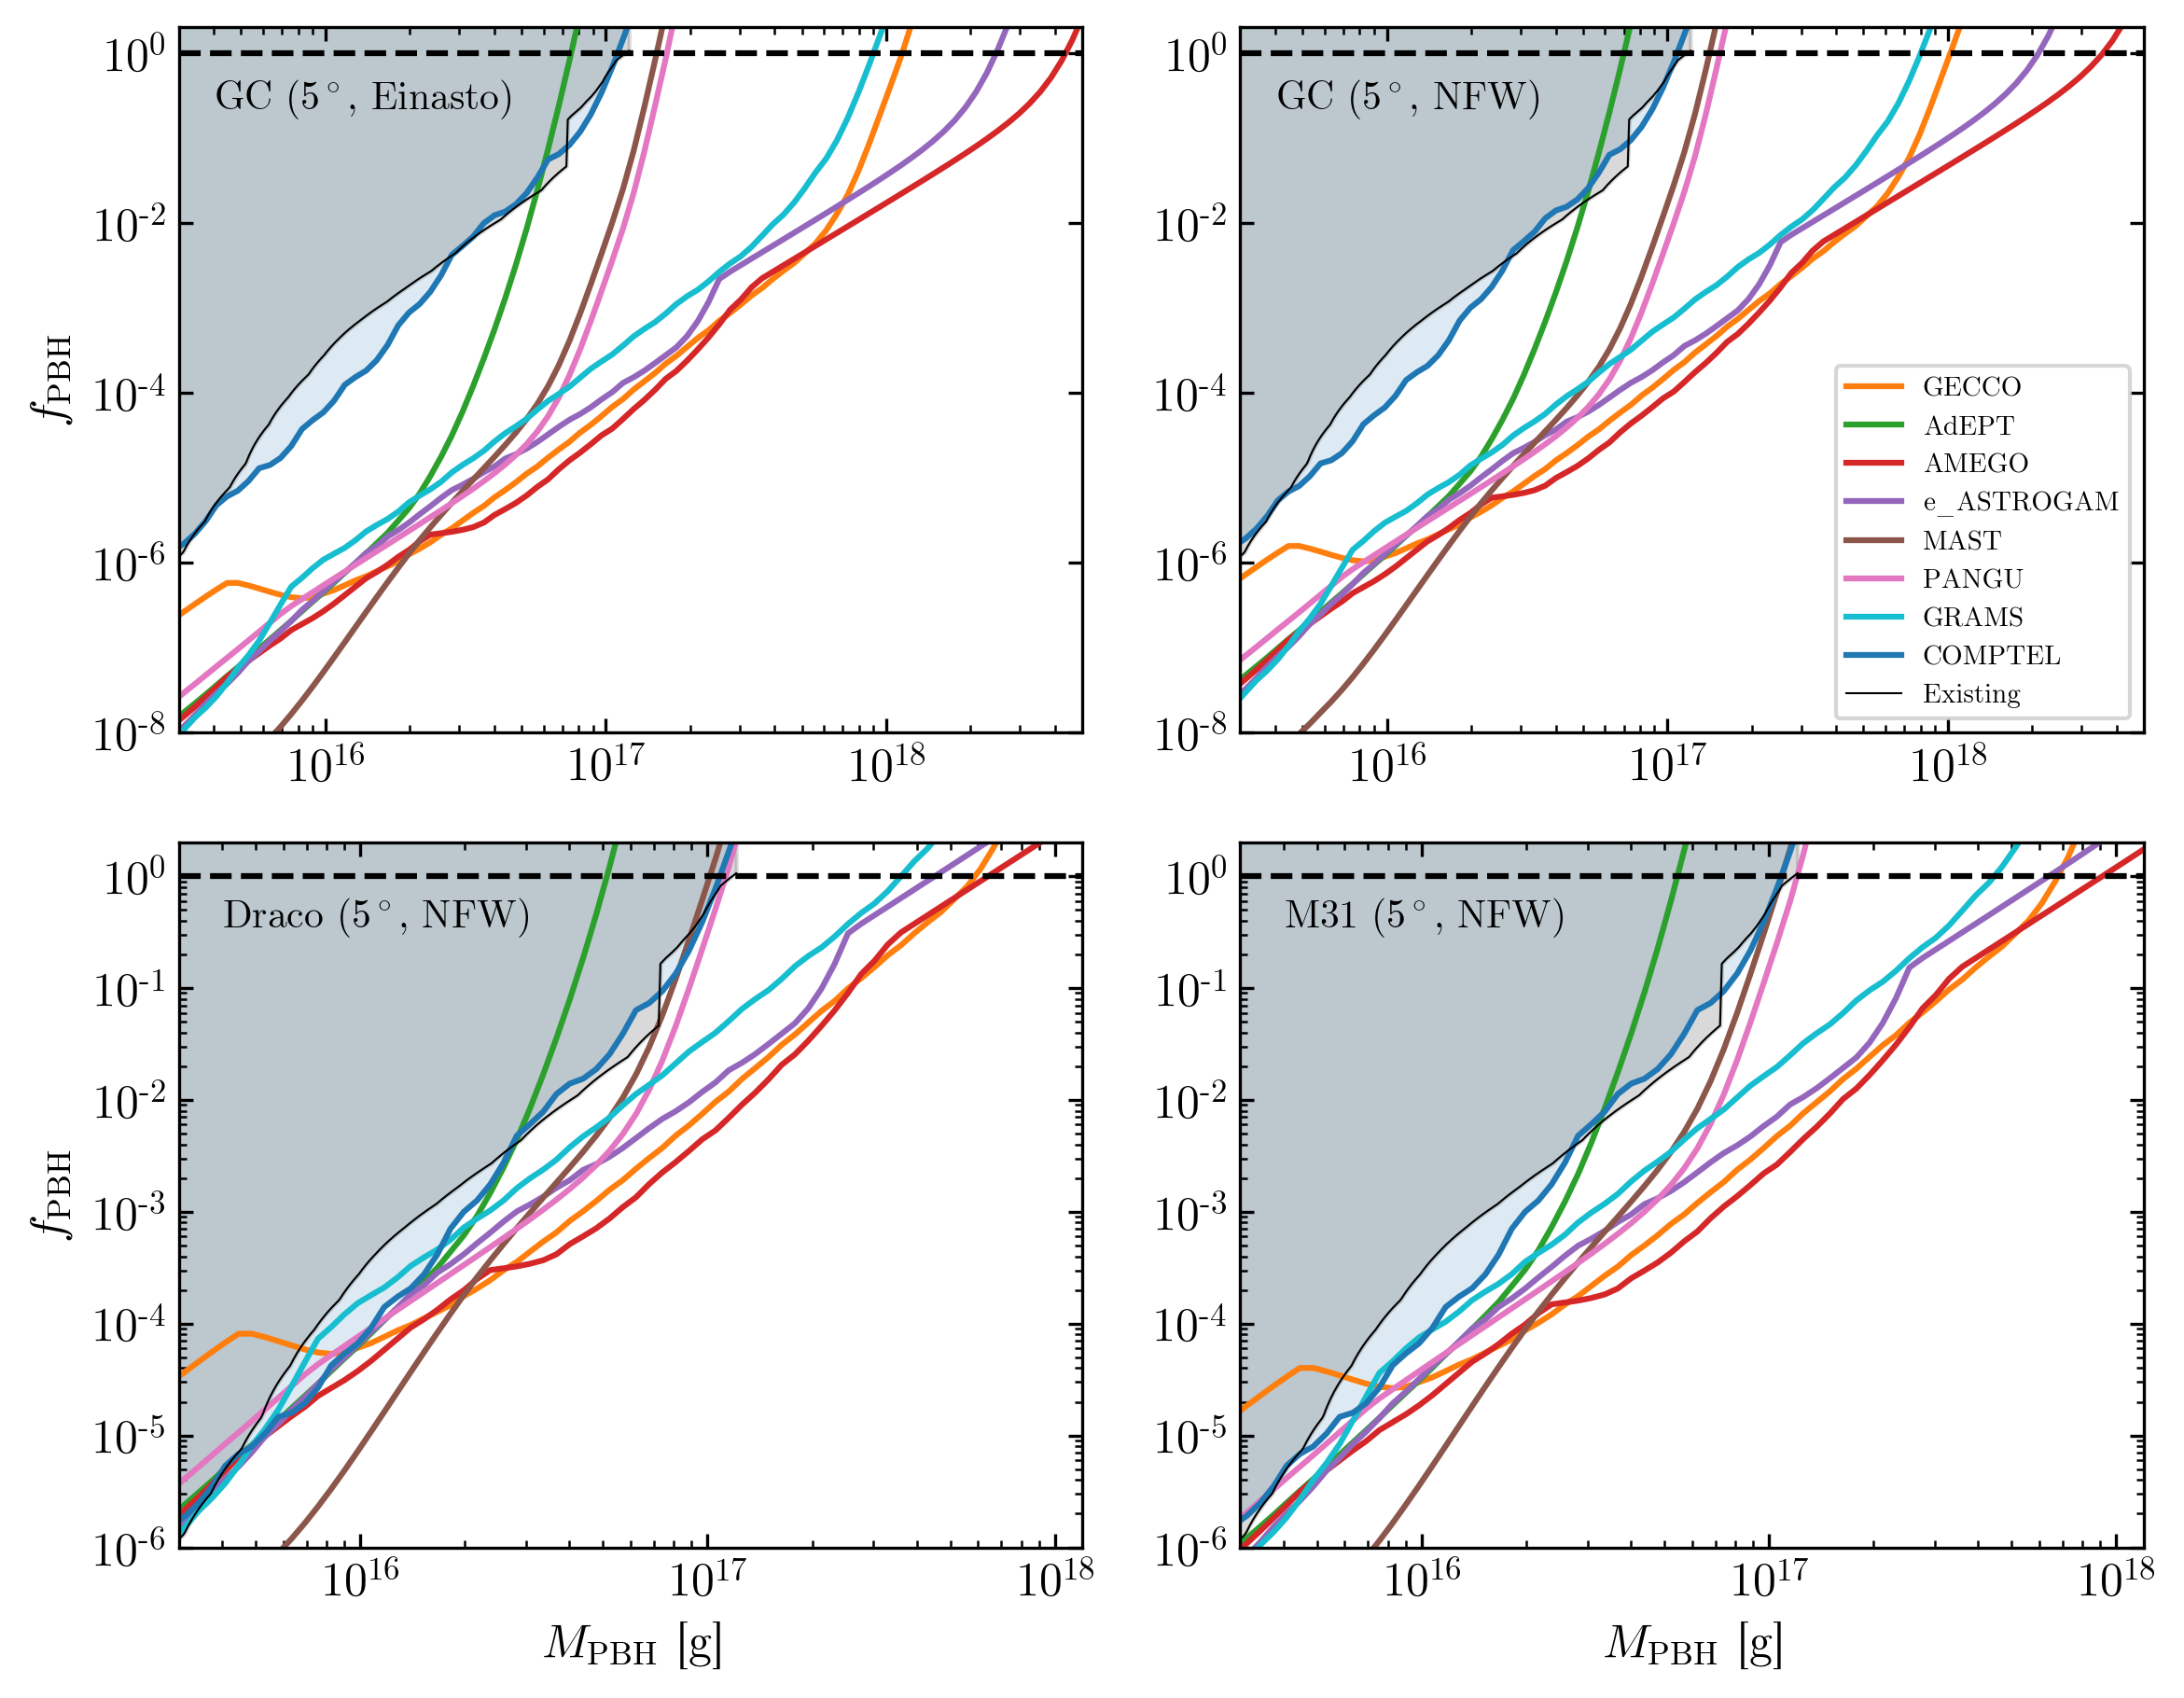

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6.25))

ax_keys = [["gc_ein", "gc_nfw"], ["draco", "m31"]]
for i in range(len(axes)):
    for j in range(len(axes[0])):
        for key, f_pbhs in f_pbh_new.items():
            if ax_keys[i][j] in key:
                telescope = get_constraint_label(key).split(" ")[0].replace("-", "_")
                axes[i, j].loglog(
                    m_pbhs,
                    f_pbhs,
                    telescope_colors[telescope.lower()],
                    linewidth=1.5,
                    label=telescope,
                )

# COMPTEL (Einasto)
comptel_ax_keys = [
    ["comptel_ein", "comptel_nfw"], ["comptel_nfw", "comptel_nfw"]
]
for i in range(len(axes)):
    for j in range(len(axes[0])):
        axes[i, j].fill_between(
            m_pbhs,
            f_pbh_new[comptel_ax_keys[i][j]],
            1000,
            color=telescope_colors["comptel"],
            alpha=0.15,
        )
        axes[i, j].loglog(
            m_pbhs,
            f_pbh_new[comptel_ax_keys[i][j]],
            label="COMPTEL",
            color=telescope_colors["comptel"],
            linewidth=1.5,
        )

# Existing constraints
f_pbh_existing = PBHBounds(default_bounds)
for ax in axes.flatten():
    ax.fill_between(*f_pbh_existing.bound_envelope(), 10, color="k", alpha=0.15)
    ax.plot(*f_pbh_existing.bound_envelope(), "k", label="Existing", linewidth=0.5)

# Target labels
axes[0, 0].text(4e15, 2.2e-1, r"GC ($5^\circ$, Einasto)", fontsize=10)
axes[0, 1].text(4e15, 2.2e-1, r"GC ($5^\circ$, NFW)", fontsize=10)
axes[1, 0].text(4e15, 3.5e-1, r"Draco ($5^\circ$, NFW)", fontsize=10)
axes[1, 1].text(4e15, 3.5e-1, r"M31 ($5^\circ$, NFW)", fontsize=10)

# Formatting
for ax in axes.flatten():
    ax.axhline(1, color="k", linestyle="--")
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.xaxis.set_ticks_position("both")
    ax.yaxis.set_ticks_position("both")
    ax.tick_params(axis="both", which="both", direction="in")

for ax in axes[0, :]:
    ax.set_xlim(3e15, 5e18)
    ax.set_ylim(1e-8, 2)

for ax in axes[1, :]:
    ax.set_xlim(3e15, 1.2e18)
    ax.set_ylim(1e-6, 2)
    ax.set_xlabel(r"$M_\mathrm{PBH}$ [g]")

for ax in axes[:, 0]:
    ax.set_ylabel(r"$f_\mathrm{PBH}$")

axes[0, 1].legend(fontsize=7)
fig.tight_layout()

fig.savefig(f"figures/pbh_bounds_T_obs={T_obs:.0e}.pdf")

## GECCO discovery reach

In [61]:
# Set up analysis
targets = {
    "gc_ein_5_deg_optimistic": (
        gc_targets_optimistic["ein"]["5 deg cone"],
        gc_bg_model_approx,
    ),
    "gc_nfw_5_deg": (gc_targets["nfw"]["5 deg cone"], gc_bg_model_approx),
    "m31_nfw_5_deg": (m31_targets["nfw"]["5 deg cone"], gecco_bg_model),
    "draco_nfw_5_deg": (draco_targets["nfw"]["5 deg cone"], gecco_bg_model),
}
telescopes = ["gecco"]
T_obs = 1e6  # s (~3 yr)

# Run it!
pbh = PBH(1e15 * g_to_MeV, spectrum_kind="secondary")  # initialize with valid mass
f_pbh_new = get_constraints(pbh, pbh._mxs, targets, telescopes, T_obs)
m_pbhs = pbh._mxs * MeV_to_g

/Users/acoogan/Physics/Sub-GeV_DM/Hazma/hazma/background_model.py:48: UserWarning: The gamma ray background model is not applicable for energy 0.100000 MeV.
  warnings.warn(
/Users/acoogan/Physics/Sub-GeV_DM/Hazma/hazma/theory/_theory_gamma_ray_limits.py:108: RuntimeWarning: overflow encountered in double_scalars
  return phi_max / phi_dm


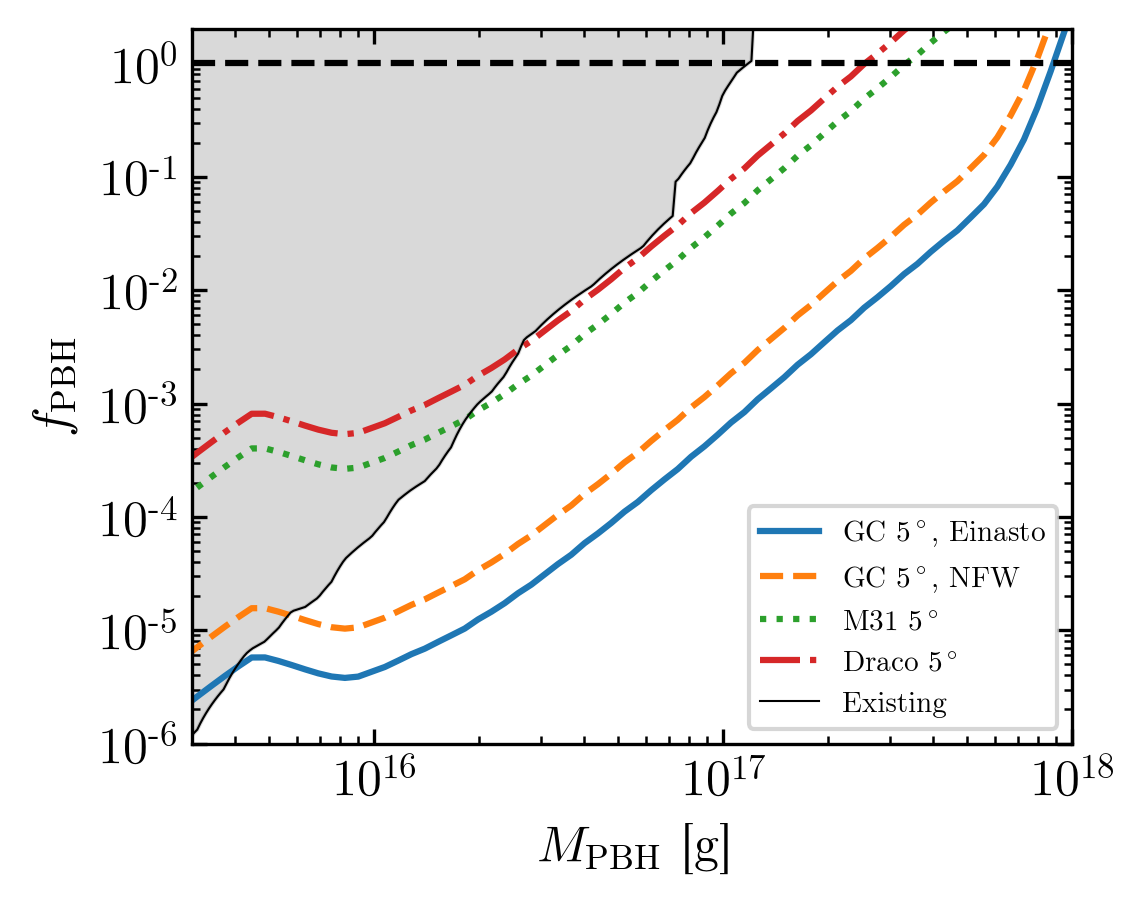

In [63]:
plt.figure(figsize=(4, 3.2))

# GECCO projections
gecco_keys = [k for k in f_pbh_new if "gecco" in k]
linestyles = ["-", "--", ":", "-."]
for color, key, ls in zip(cycle(mpl_colors), gecco_keys, linestyles):
    plt.loglog(
        pbh._mxs * MeV_to_g,
        f_pbh_new[key],
        linestyle=ls,
        color=color,
        label=get_constraint_label(key).replace("GECCO (", "").replace(")", ""),
    )

# Existing constraints
f_pbh_existing = PBHBounds(default_bounds + ["COMPTEL"])
plt.fill_between(*f_pbh_existing.bound_envelope(), 10, color="k", alpha=0.15)
plt.plot(*f_pbh_existing.bound_envelope(), "k", label="Existing", linewidth=0.5)

plt.xlabel(r"$M_\mathrm{PBH}$ [g]")
plt.ylabel(r"$f_\mathrm{PBH}$")
plt.axhline(1, color="k", linestyle="--")
plt.xlim(3e15, 1e18)
plt.ylim(1e-6, 2)
plt.xscale("log")
plt.yscale("log")
plt.gca().xaxis.set_ticks_position("both")
plt.gca().yaxis.set_ticks_position("both")
plt.gca().tick_params(axis="both", which="both", direction="in")
plt.legend(fontsize=7)  # , bbox_to_anchor=(1, 0.5))
plt.gca().set_yticks(np.geomspace(1e-6, 1e0, 7))

plt.tight_layout()

plt.savefig(f"figures/pbh_bounds_gecco_T_obs={T_obs:.0e}.pdf")

## Effective areas

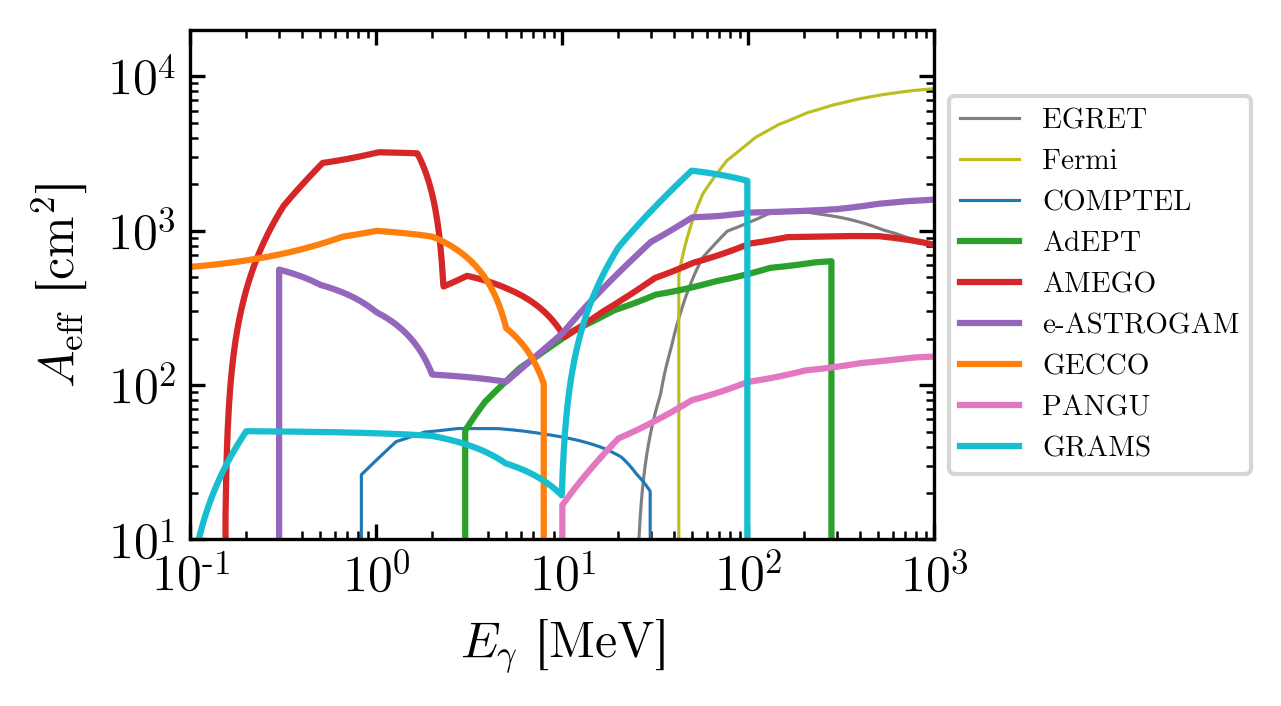

In [39]:
plt.figure(figsize=(4, 2.25))

e_gams = np.geomspace(0.1, 1e3, 2000)

plt.plot(
    e_gams,
    A_eff_egret(e_gams),
    color=telescope_colors["egret"],
    label="EGRET",
    linewidth=0.75,
)
plt.plot(
    e_gams,
    A_eff_fermi(e_gams),
    color=telescope_colors["fermi"],
    label="Fermi",
    linewidth=0.75,
)
plt.plot(
    e_gams,
    A_eff_comptel(e_gams),
    color=telescope_colors["comptel"],
    label="COMPTEL",
    linewidth=0.75,
)
plt.plot(e_gams, A_eff_adept(e_gams), color=telescope_colors["adept"], label="AdEPT")
plt.plot(e_gams, A_eff_amego(e_gams), color=telescope_colors["amego"], label="AMEGO")
plt.plot(
    e_gams,
    A_eff_e_astrogam(e_gams),
    color=telescope_colors["e_astrogam"],
    label="e-ASTROGAM",
)
plt.plot(e_gams, A_eff_gecco(e_gams), color=telescope_colors["gecco"], label="GECCO")
plt.plot(e_gams, A_eff_pangu(e_gams), color=telescope_colors["pangu"], label="PANGU")
plt.plot(e_gams, A_eff_grams(e_gams), color=telescope_colors["grams"], label="GRAMS")

plt.xlim(e_gams[[0, -1]])
plt.ylim(1e1, 2e4)
plt.xscale("log")
plt.yscale("log")
plt.gca().xaxis.set_ticks_position("both")
plt.gca().yaxis.set_ticks_position("both")
plt.gca().tick_params(axis="both", which="both", direction="in")
plt.xlabel(r"$E_\gamma$ [MeV]")
plt.ylabel(r"$A_\mathrm{eff}$ [cm$^2$]")

box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=7)

# plt.savefig("figures/a_effs.pdf", bbox_inches="tight")

## Sanity check: evaporation spectra

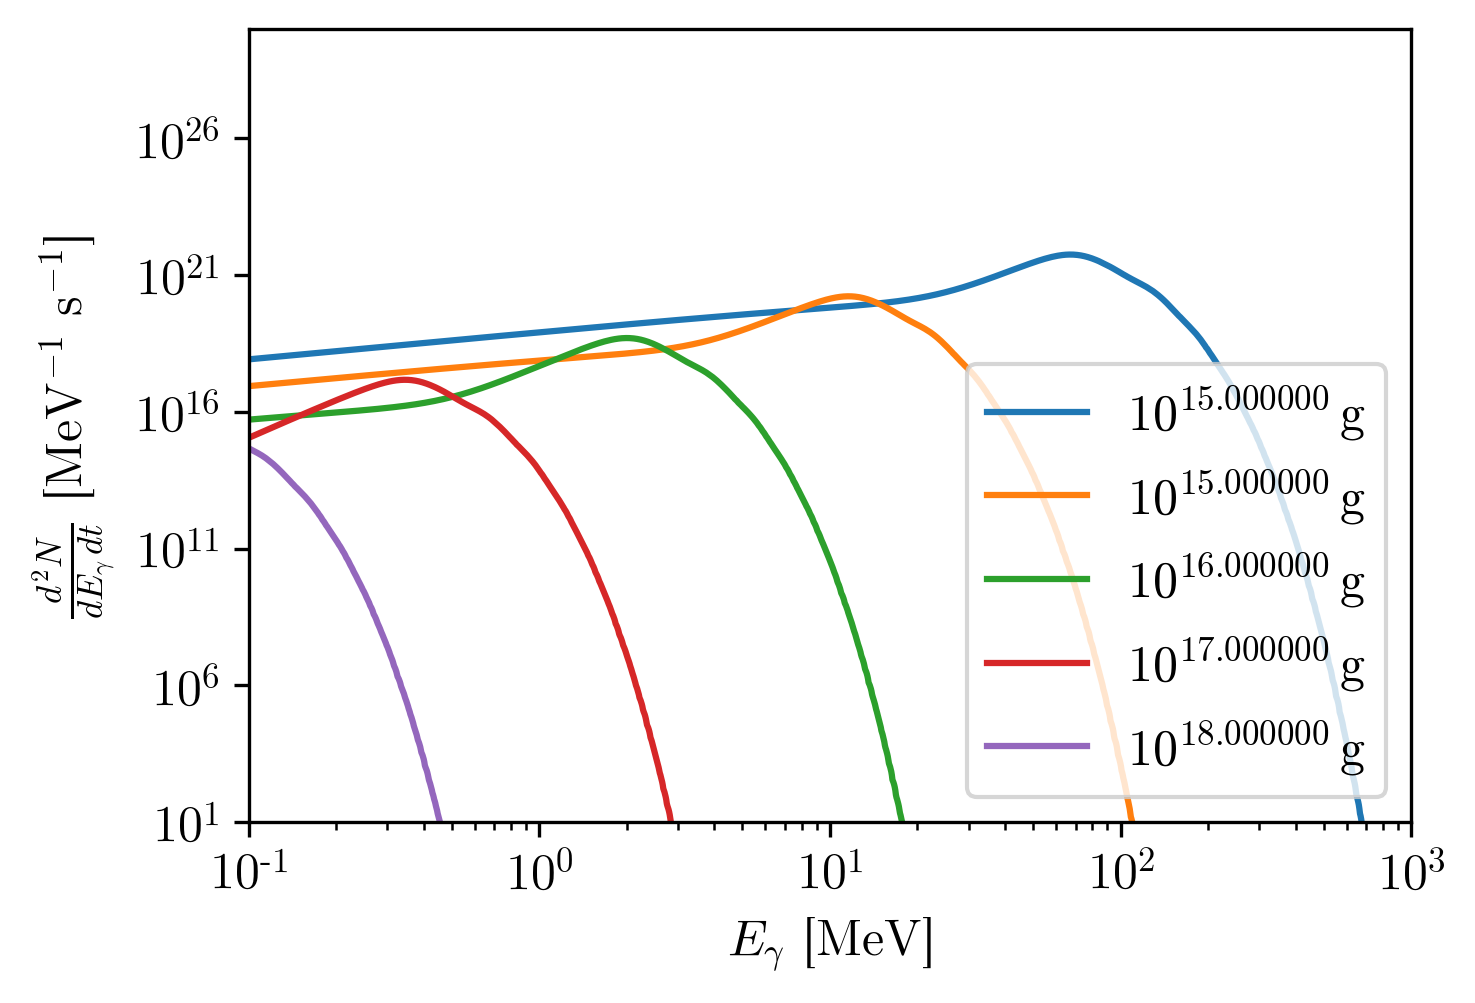

In [58]:
pbh_sec = PBH(1e15 * g_to_MeV, spectrum_kind="secondary")
for mx, color in zip(pbh_sec._mxs[::20], mpl_colors):
    pbh_sec.mx = mx
    plt.loglog(
        e_gams,
        e_gams ** 2 * pbh_sec.total_spectrum(e_gams),
        color=color,
        label=r"$10^{%f}\, \mathrm{g}$" % int(np.log10(mx * MeV_to_g)),
    )

plt.xlim(e_gams[[0, -1]])
plt.ylim(1e1, 1e30)
plt.xlabel(r"$E_\gamma$ [MeV]")
plt.ylabel(r"$\frac{d^2N}{dE_\gamma\, dt}$ [MeV$^{-1}$ s$^{-1}$]")
plt.legend()